In [11]:
import pandas as pd  # Пандаларды импорттаймыз – деректермен жұмыс істеуге арналған кітапхана

# CSV файл жолы (файлды жұмыс істейтін қалтаға көшіру ұсынылады)
file_path = "C:/Users/14ken/Downloads/spam7.csv"

# Деректерді CSV файлынан оқимыз
df = pd.read_csv(file_path)

# 'yesno' бағанының негізінде жаңа 'spam' бағанын құрамыз:
# Егер мән 'y' болса – 1, әйтпесе – 0
df['spam'] = df['yesno'].apply(lambda x: 1 if x == 'y' else 0)

# Бірінші бағанды (әдетте индекс) және 'yesno' бағанын өшіреміз
df = df.drop(columns=[df.columns[0], 'yesno'])

# Барлық бағандардың атауларын аламыз
columns = df.columns

# Жаңа белгілерді құрамыз: әрбір екі бағанды өзара көбейту арқылы
# Соңғы баған – 'spam', оны қоспаймыз
for i in range(len(columns)):
    for j in range(i+1, len(columns)-1):  # 'spam' бағанын есепке алмаймыз
        new_feature = columns[i] + "_" + columns[j]  # Жаңа бағанның атауын құрамыз
        df[new_feature] = df[columns[i]] * df[columns[j]]  # Көбейту нәтижесін жаңа баған ретінде қосамыз

# Мәліметтерді екіге бөлеміз: белгілер (X) және мақсатты айнымалы (y)
X = df.drop(columns=['spam'])  # Белгілер (тәуелсіз айнымалылар)
y = df['spam']                 # Мақсатты айнымалы (тәуелді айнымалы)


In [12]:
df

,crl.tot,dollar,bang,money,n000,make,spam,crl.tot_dollar,crl.tot_bang,crl.tot_money,...,dollar_bang,dollar_money,dollar_n000,dollar_make,bang_money,bang_n000,bang_make,money_n000,money_make,n000_make
0,278,0.000,0.778,0.00,0.00,0.00,1,0.000,216.284,0.00,...,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.0000,0.0000
1,1028,0.180,0.372,0.43,0.43,0.21,1,185.040,382.416,442.04,...,0.066960,0.07740,0.07740,0.03780,0.15996,0.15996,0.07812,0.1849,0.0903,0.0903
2,2259,0.184,0.276,0.06,1.16,0.06,1,415.656,623.484,135.54,...,0.050784,0.01104,0.21344,0.01104,0.01656,0.32016,0.01656,0.0696,0.0036,0.0696
3,191,0.000,0.137,0.00,0.00,0.00,1,0.000,26.167,0.00,...,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.0000,0.0000
4,191,0.000,0.135,0.00,0.00,0.00,1,0.000,25.785,0.00,...,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,88,0.000,0.000,0.00,0.00,0.31,0,0.000,0.000,0.00,...,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.0000,0.0000
4597,14,0.000,0.353,0.00,0.00,0.00,0,0.000,4.942,0.00,...,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.0000,0.0000
4598,118,0.000,0.000,0.00,0.00,0.30,0,0.000,0.000,0.00,...,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.0000,0.0000
4599,78,0.000,0.000,0.00,0.00,0.96,0,0.000,0.000,0.00,...,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.0000,0.0000


In [13]:
import pandas as pd               # Деректермен жұмыс істеу үшін pandas кітапханасы
import numpy as np                # Ғылыми есептеулерге арналған numpy кітапханасы
import matplotlib.pyplot as plt   # График салу үшін matplotlib
from sklearn.model_selection import train_test_split, GridSearchCV  # Деректерді бөлу және гиперпараметрлерді іріктеу
from sklearn.ensemble import GradientBoostingClassifier              # Градиенттік бустинг моделі
from sklearn.metrics import accuracy_score                          # Дәлдікті бағалау метрикасы

# Деректерді екіге бөлеміз: белгілер (X) және мақсатты айнымалы (y)
X = df.drop(columns=['spam'])  # Белгілер – барлық бағандардан 'spam'-ды алып тастағандағы мәліметтер
y = df['spam']                 # Мақсатты айнымалы – 'spam' бағаны

# Деректерді оқыту және тест жиынына бөлу (80% – оқыту, 20% – тест)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **7.4.2 тапсырмасы** – GradientBoostingClassifier моделін оқыту
model = GradientBoostingClassifier(random_state=42)  # Модельді инициализациялау
model.fit(X_train, y_train)                          # Модельді оқыту

# Тест жиынында болжау жасаймыз
y_pred = model.predict(X_test)

# Модельдің дәлдігін бағалау
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.3f}')  # Үш ондық дәлдікпен басып шығару


Accuracy: 0.865


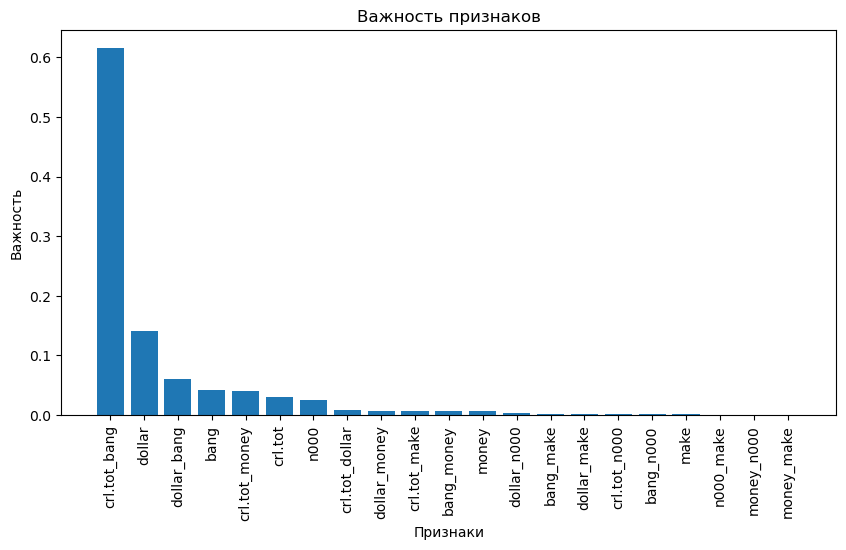

Третий по важности признак: dollar_bang


In [14]:
# Задание 7.4.3 - Важность признаков
importances = model.feature_importances_
feature_names = X.columns
sorted_indices = np.argsort(importances)[::-1] # Маңыздылық бойынша кему ретімен индекстерді сұрыптаймыз

plt.figure(figsize=(10, 5))
plt.bar(range(len(importances)), importances[sorted_indices], align='center')# Барлық белгілер үшін бағандық диаграмма саламыз
plt.xticks(range(len(importances)), feature_names[sorted_indices], rotation=90)# X-оське белгілердің аттарын жазамыз (көлденең бұрып көрсету үшін rotation=90)
plt.xlabel('Признаки')
plt.ylabel('Важность')
plt.title('Важность признаков')
plt.show()

third_important_feature = feature_names[sorted_indices][2]
print(f'Третий по важности признак: {third_important_feature}')

In [15]:
#Тапсырма 7.4.4
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Параметрлер торы: оқыту жылдамдығы мен ағаштар саны
param_grid = {
    'learning_rate': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1], 
    'n_estimators': [100, 250, 500, 750, 1000, 1250, 1500, 1750]
}

# Модельді бастаймыз
model = GradientBoostingClassifier(random_state=42)

# GridSearchCV: ең жақсы параметрлерді табу үшін
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', 
                           n_jobs=-1, cv=5)

# Модельді оқытамыз
grid_search.fit(X_train, y_train)

# Ең жақсы нәтиженің дәлдігін аламыз
best_accuracy = grid_search.best_score_

# Үш таңбалы дәлдікпен көрсетеміз
round(best_accuracy, 3)


0.884

In [16]:
# Задание 7.4.5 - Количество обученных моделей
num_models = len(param_grid['learning_rate']) * len(param_grid['n_estimators'])
print(f'Количество обученных моделей: {num_models}')

Количество обученных моделей: 48


In [17]:
# Задание 7.4.6
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Бұрын табылған параметрлерді пайдаланып модель құрамыз
best_learning_rate = 0.1  # Алдыңғы қадамда таңдалған learning_rate
best_n_estimators = 100   # Алдыңғы қадамда таңдалған ағаштар саны

# Таңдалған параметрлермен Gradient Boosting классификаторын инициализациялаймыз
model = GradientBoostingClassifier(
    learning_rate=best_learning_rate, 
    n_estimators=best_n_estimators, 
    random_state=42
)

# max_depth параметрі үшін іздеу торын (grid) анықтаймыз — 5-тен 15-ке дейінгі мәндер
param_grid = {'max_depth': range(5, 16)}

# GridSearchCV-ді орнатамыз: 5-катталы кросс-валидациямен және дәлдік (accuracy) метрикасымен
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', 
                           n_jobs=-1, cv=5)

# GridSearchCV көмегімен модельді үйретеміз
grid_search.fit(X_train, y_train)

# Ең жақсы max_depth параметрін аламыз
best_max_depth = grid_search.best_params_['max_depth']

# Нәтижені шығарамыз
print(f"Ең жақсы max_depth параметрі: {best_max_depth}")


Лучший параметр max_depth: 5


In [21]:
# Задание 7.4.7
import numpy as np
from sklearn.tree import DecisionTreeClassifier

def AdaBoost_scratch(X, y, M=10, learning_rate=0.001):
    # Сэмпл саны
    N = len(y)
    
    # Қызметтік тізімдерді инициализациялау
    estimator_list, y_predict_list = [], []
    estimator_error_list, estimator_weight_list = [], []
    sample_weight_list = []

    # Бастапқы салмақтарды орнату (барлық бақылаулар үшін тең)
    sample_weight = np.ones(N) / N
    sample_weight_list.append(sample_weight.copy())

    # M базалық модель құру циклі
    for m in range(M):
        # Базалық модель (тұрақты шешім ағашы)
        estimator = DecisionTreeClassifier(max_depth=1, max_leaf_nodes=2)
        estimator.fit(X, y, sample_weight=sample_weight)
        y_predict = estimator.predict(X)

        # Қате болжаулар үшін маска
        incorrect = (y_predict != y)

        # Классификатор қателігін есептеу
        estimator_error = np.sum(sample_weight * incorrect) / np.sum(sample_weight)

        # Жаңа модельдің салмағын есептеу
        estimator_weight = learning_rate * np.log((1 - estimator_error) / max(estimator_error, 1e-10))  # 0-ге бөлінбеу үшін max қолдандық

        # Объектілердің салмағын жаңарту
        sample_weight *= np.exp(estimator_weight * incorrect)
        sample_weight /= np.sum(sample_weight)  # Салмақтарды нормализациялау

        # Ағымдағы модель мен метрикаларды сақтау
        estimator_list.append(estimator)
        y_predict_list.append(y_predict.copy())
        estimator_error_list.append(estimator_error)
        estimator_weight_list.append(estimator_weight)
        sample_weight_list.append(sample_weight.copy())

    # Барлық тізімдерді массивке айналдыру
    estimator_list = np.asarray(estimator_list)
    y_predict_list = np.asarray(y_predict_list)
    estimator_error_list = np.asarray(estimator_error_list)
    estimator_weight_list = np.asarray(estimator_weight_list)
    sample_weight_list = np.asarray(sample_weight_list)

    # Взвешенный (салмақталған) болжамдарды есептеу
    weighted_preds = np.dot(estimator_weight_list, y_predict_list)
    preds = np.sign(weighted_preds)  # Нақты классты анықтау

    # Дәлдікті есептеу
    accuracy = (preds == y).sum() / N
    print('Accuracy = ', round(accuracy, 3))

    return estimator_list, estimator_weight_list, sample_weight_list

# Функцияны қолдану мысалы
estimator_list, estimator_weight_list, sample_weight_list = AdaBoost_scratch(X, y, M=10, learning_rate=0.001)


Accuracy =  0.823


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Деректер файлының нақты жолы
df_path = "C:/Users/14ken/Downloads/Glass Classification/glass.csv"

# CSV файлын оқимыз
glass_df = pd.read_csv(df_path)

# Белгілер (X1) мен мақсатты баған (y1) бөліп аламыз
X1, y1 = glass_df.iloc[:, :-1], glass_df.iloc[:, -1]

# Мақсатты бағанды (y1) сандарға кодтаймыз
y1 = pd.Series(LabelEncoder().fit_transform(y1))

# Деректерді оқыту және тестке бөлеміз
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=0)

# Алғашқы 5 қатарды шығару
print(glass_df.head())


        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1


In [26]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

# Диабет деректер жиынын жүктейміз
X2, y2 = load_diabetes(return_X_y=True, as_frame=True)

# Деректерді бөлу
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=0)

# Алғашқы бірнеше қатарды шығару
print(X2.head())
print(y2.head())


        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  
0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64


In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_percentage_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingClassifier, HistGradientBoostingRegressor
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.tree import DecisionTreeRegressor

class GBMClassifier:
    def __init__(self, logitboost=False, learning_rate=0.1, n_estimators=100,
                 max_depth=3, random_state=0):
        self.logitboost = logitboost
        self.learning_rate = learning_rate
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.random_state = random_state

    def _softmax(self, predictions):
        exp = np.exp(predictions)
        return exp / np.sum(exp, axis=1, keepdims=True)

    def _compute_gammas(self, residuals, leaf_indexes, eps=1e-4):
        gammas = []
        for j in np.unique(leaf_indexes):
            x_i = np.where(leaf_indexes == j)
            numerator = np.sum(residuals[x_i])
            norm_residuals_xi = np.linalg.norm(residuals[x_i]) + eps
            denominator = np.sum(norm_residuals_xi * (1 - norm_residuals_xi))
            gamma = (self.K - 1) / self.K * numerator / denominator
            gammas.append(gamma)
        return gammas

    def fit(self, X, y):
        self.K = len(np.unique(y))  # Number of classes
        self.trees = {k: [] for k in range(self.K)}
        one_hot_y = pd.get_dummies(y).to_numpy()   # One-hot encoding
        predictions = np.zeros(one_hot_y.shape)

        for _ in range(self.n_estimators):
            probabilities = self._softmax(predictions)
            for k in range(self.K):
                if self.logitboost:  # LogitBoost implementation
                    numerator = (one_hot_y.T[k] - probabilities.T[k])
                    denominator = probabilities.T[k] * (1 - probabilities.T[k])
                    residuals = (self.K - 1) / self.K * numerator / denominator
                    weights = denominator
                else:
                    residuals = one_hot_y.T[k] - probabilities.T[k]
                    weights = None

                tree = DecisionTreeRegressor(criterion='friedman_mse', max_depth=self.max_depth,
                                             random_state=self.random_state)
                tree.fit(X, residuals, sample_weight=weights)
                self.trees[k].append(tree)

                leaf_indexes = tree.apply(X)
                gammas = [] if self.logitboost else self._compute_gammas(residuals, leaf_indexes)
                predictions.T[k] += self.learning_rate * tree.predict(X) + np.sum(gammas)

    def predict(self, samples):
        predictions = np.zeros((len(samples), self.K))
        for i in range(self.n_estimators):
            for k in range(self.K):
                predictions.T[k] += self.learning_rate * self.trees[k][i].predict(samples)
        return np.argmax(predictions, axis=1)

# Создаем экземпляр модели с max_depth=5
clf = GBMClassifier(logitboost=False, learning_rate=0.1, n_estimators=100, max_depth=5, random_state=42)
clf.fit(X1_train, y1_train)

# Прогнозы и оценка точности
y1_pred = clf.predict(X1_test)
accuracy = accuracy_score(y1_test, y1_pred)
print(f'Accuracy with max_depth=5: {accuracy}')

Accuracy with max_depth=5: 0.6481481481481481


C:\Users\14ken\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  caller_name=self.__class__.__name__,
C:\Users\14ken\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  caller_name=self.__class__.__name__,
C:\Users\14ken\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  caller_name=self.__class__.__name__,
C:\Users\14ken\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  caller_name=self.__class__.__name__,
C:\Users\14ken\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature 

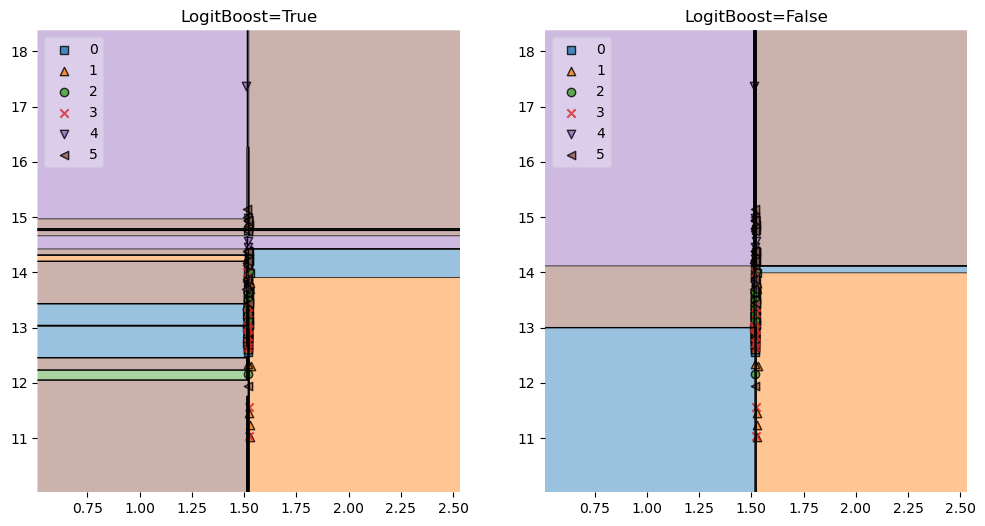

Accuracy with logitboost=True: 0.6851851851851852
Accuracy with logitboost=False: 0.6111111111111112


In [35]:
# Выбор 2 признаков
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

# Загрузка данных
df_path = "C:/Users/14ken/Downloads/Glass Classification/glass.csv"
glass_df = pd.read_csv(df_path)

# Разделение на признаки и целевую переменную
X1, y1 = glass_df.iloc[:, :-1], glass_df.iloc[:, -1]

# Кодирование целевой переменной (если она категориальная)
y1 = pd.Series(LabelEncoder().fit_transform(y1))

# Разделение на обучающие и тестовые наборы
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=0)

# Выбор двух признаков (например, первые два)
X1_train_features = X1_train.iloc[:, [0, 1]]
X1_test_features = X1_test.iloc[:, [0, 1]]

# Модели с logitboost=True и logitboost=False
clf_logitboost = GBMClassifier(logitboost=True, learning_rate=0.1, n_estimators=100, max_depth=3, random_state=42)
clf_no_logitboost = GBMClassifier(logitboost=False, learning_rate=0.1, n_estimators=100, max_depth=3, random_state=42)

# Обучение моделей
clf_logitboost.fit(X1_train_features, y1_train)
clf_no_logitboost.fit(X1_train_features, y1_train)

# Построение границ решений
plt.figure(figsize=(12, 6))

# Модель с logitboost=True
plt.subplot(1, 2, 1)
plot_decision_regions(X1_train_features.values, y1_train.values, clf=clf_logitboost, legend=2)
plt.title("LogitBoost=True")

# Модель с logitboost=False
plt.subplot(1, 2, 2)
plot_decision_regions(X1_train_features.values, y1_train.values, clf=clf_no_logitboost, legend=2)
plt.title("LogitBoost=False")

plt.show()

# Оценка точности моделей
y1_pred_logitboost = clf_logitboost.predict(X1_test_features)
accuracy_logitboost = accuracy_score(y1_test, y1_pred_logitboost)
print(f'Accuracy with logitboost=True: {accuracy_logitboost}')

y1_pred_no_logitboost = clf_no_logitboost.predict(X1_test_features)
accuracy_no_logitboost = accuracy_score(y1_test, y1_pred_no_logitboost)
print(f'Accuracy with logitboost=False: {accuracy_no_logitboost}')


In [36]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
import numpy as np

# Задача 3: Тестирование GBMRegressor с медианой
class CustomGBMRegressor:
    def __init__(self, learning_rate=0.1, n_estimators=100, max_depth=3, random_state=0):
        self.learning_rate = learning_rate
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.random_state = random_state
        self.trees = []

    def fit(self, X, y):
        # Изменяем начальное приближение на медиану
        self.initial_leaf = np.median(y)
        predictions = np.zeros(len(y)) + self.initial_leaf

        for _ in range(self.n_estimators):
            residuals = y - predictions
            tree = DecisionTreeRegressor(criterion='friedman_mse', max_depth=self.max_depth,
                                         random_state=self.random_state)
            tree.fit(X, residuals)
            predictions += self.learning_rate * tree.predict(X)
            self.trees.append(tree)

    def predict(self, X):
        predictions = np.zeros(X.shape[0]) + self.initial_leaf
        for tree in self.trees:
            predictions += self.learning_rate * tree.predict(X)
        return predictions

# Обучение модели с медианой
clf_median = CustomGBMRegressor(learning_rate=0.1, n_estimators=100, max_depth=3, random_state=42)
clf_median.fit(X2_train, y2_train)

# Прогнозы
y_pred_median = clf_median.predict(X2_test)

# Оценка ошибки MSE
mse_median = mean_squared_error(y2_test, y_pred_median)
print(f'Mean Squared Error with median as initial guess: {mse_median}')

# Для сравнения обучаем стандартный GradientBoostingRegressor из sklearn
gb_regressor = GradientBoostingRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
gb_regressor.fit(X2_train, y2_train)

# Прогнозы
y_pred_sklearn = gb_regressor.predict(X2_test)

# Оценка ошибки MSE
mse_sklearn = mean_squared_error(y2_test, y_pred_sklearn)
print(f'Mean Squared Error with sklearn GradientBoostingRegressor: {mse_sklearn}')


Mean Squared Error with median as initial guess: 3880.0440067899103
Mean Squared Error with sklearn GradientBoostingRegressor: 3866.4663140239163


In [37]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Задача 4: Сравнение GBMClassifier и sklearn GradientBoostingClassifier
# Обучение собственной модели
clf_custom = GBMClassifier(logitboost=False, learning_rate=0.1, n_estimators=100, max_depth=3, random_state=42)
clf_custom.fit(X1_train, y1_train)

# Прогнозы
y_pred_custom = clf_custom.predict(X1_test)

# Обучение модели из sklearn
gb_sklearn = GradientBoostingClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
gb_sklearn.fit(X1_train, y1_train)

# Прогнозы
y_pred_sklearn = gb_sklearn.predict(X1_test)

# Оценка качества предсказаний
accuracy_custom = accuracy_score(y1_test, y_pred_custom)
f1_custom = f1_score(y1_test, y_pred_custom, average='weighted')
conf_matrix_custom = confusion_matrix(y1_test, y_pred_custom)

accuracy_sklearn = accuracy_score(y1_test, y_pred_sklearn)
f1_sklearn = f1_score(y1_test, y_pred_sklearn, average='weighted')
conf_matrix_sklearn = confusion_matrix(y1_test, y_pred_sklearn)

# Вывод результатов
print(f"Custom GBMClassifier Accuracy: {accuracy_custom}")
print(f"Custom GBMClassifier F1 Score: {f1_custom}")
print(f"Custom GBMClassifier Confusion Matrix:\n{conf_matrix_custom}")
print(f"Sklearn GradientBoostingClassifier Accuracy: {accuracy_sklearn}")
print(f"Sklearn GradientBoostingClassifier F1 Score: {f1_sklearn}")
print(f"Sklearn GradientBoostingClassifier Confusion Matrix:\n{conf_matrix_sklearn}")


Custom GBMClassifier Accuracy: 0.6111111111111112
Custom GBMClassifier F1 Score: 0.5753086419753087
Custom GBMClassifier Confusion Matrix:
[[10  3  0  0  1  0]
 [ 9 14  0  1  0  0]
 [ 2  3  0  0  0  0]
 [ 0  1  0  0  0  1]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  7]]
Sklearn GradientBoostingClassifier Accuracy: 0.6666666666666666
Sklearn GradientBoostingClassifier F1 Score: 0.6499118165784831
Sklearn GradientBoostingClassifier Confusion Matrix:
[[12  2  0  0  0  0]
 [ 7 15  1  1  0  0]
 [ 3  1  1  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  1  0  0  1  0]
 [ 0  0  0  0  0  7]]


In [38]:
gbc = GBMClassifier(random_state=0)
gbc.fit(X1_train, y1_train)
gbc_pred_res = gbc.predict(X1_test)
gbc_accuracy = accuracy_score(y1_test, gbc_pred_res)
print(f'gbc accuracy: {gbc_accuracy}')
print(gbc_pred_res)


gbc accuracy: 0.6111111111111112
[5 0 1 4 1 1 0 1 1 1 1 0 1 1 1 5 0 1 1 1 5 0 5 5 1 0 5 0 1 0 0 4 1 0 0 0 0
 0 0 5 1 4 1 0 0 1 0 1 0 1 0 3 5 0]


In [39]:
logit_bc = GBMClassifier(logitboost=True, random_state=0)
logit_bc.fit(X1_train, y1_train)
logit_bc_pred_res = logit_bc.predict(X1_test)
logit_bc_accuracy = accuracy_score(y1_test, logit_bc_pred_res)
print(f'logit_gbc accuracy: {logit_bc_accuracy}')
print(logit_bc_pred_res)


logit_gbc accuracy: 0.6851851851851852
[5 0 1 4 1 1 0 1 1 1 1 0 0 1 1 5 2 1 1 0 3 0 5 5 2 0 5 0 0 1 0 0 1 0 0 0 0
 2 0 5 1 4 1 0 1 1 0 1 0 1 0 1 5 0]


In [44]:
#Задание 6.6.1
def compute_meta_feature_mean(clf, X_train, X_test, y_train, cv):
    """Эта функция подсчитывает признаки для мета-классификатора. Они являются вероятностями классов при решении задачи многоклассовой классификации."""
    n_classes = len(np.unique(y_train))
    X_meta_train = np.zeros((len(X_train), n_classes), dtype=np.float32)
    X_meta_test = np.zeros((len(X_test), n_classes), dtype=np.float32)

    # Создаём массивы для хранения предсказаний на тестовых данных
    test_preds = np.zeros((cv.get_n_splits(), len(X_test), n_classes))

    for i, (train_fold_index, predict_fold_index) in enumerate(cv.split(X_train)):
        X_fold_train, X_fold_predict = X_train[train_fold_index], X_train[predict_fold_index]
        y_fold_train = y_train[train_fold_index]

        folded_clf = clone(clf)
        folded_clf.fit(X_fold_train, y_fold_train)

        # Сохраняем вероятности на тренировочных данных
        X_meta_train[predict_fold_index] = folded_clf.predict_proba(X_fold_predict)
        # Сохраняем предсказания на тестовой выборке для усреднения
        test_preds[i] = folded_clf.predict_proba(X_test)

    # Усредняем предсказания на тестовой выборке
    X_meta_test = test_preds.mean(axis=0)
    
    return X_meta_train, X_meta_test


In [45]:
#Задание 6.6.2
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.base import clone
from sklearn.metrics import accuracy_score
from tqdm import tqdm

# Определяем функцию для генерации мета-признаков
def compute_meta_feature(clf, X_train, X_test, y_train, cv):
    n_classes = len(np.unique(y_train))
    X_meta_train = np.zeros((len(y_train), n_classes), dtype=np.float32)

    splits = cv.split(X_train)
    for train_fold_index, predict_fold_index in splits:
        X_fold_train, X_fold_predict = X_train[train_fold_index], X_train[predict_fold_index]
        y_fold_train = y_train[train_fold_index]

        folded_clf = clone(clf)
        folded_clf.fit(X_fold_train, y_fold_train)

        X_meta_train[predict_fold_index] = folded_clf.predict_proba(X_fold_predict)

    meta_clf = clone(clf)
    meta_clf.fit(X_train, y_train)

    X_meta_test = meta_clf.predict_proba(X_test)

    return X_meta_train, X_meta_test

def generate_meta_features(classifiers, X_train, X_test, y_train, cv):
    features = [
        compute_meta_feature(clf, X_train, X_test, y_train, cv)
        for clf in tqdm(classifiers)
    ]

    stacked_features_train = np.hstack([
        features_train for features_train, features_test in features
    ])

    stacked_features_test = np.hstack([
        features_test for features_train, features_test in features
    ])

    return stacked_features_train, stacked_features_test

# Загружаем датасет
from sklearn.datasets import load_digits
dataset = load_digits()
X, y = dataset['data'], dataset['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# Определяем классификаторы
classifiers = [
    LogisticRegression(penalty='l1', C=0.001, solver='saga', max_iter=2000, multi_class='ovr', random_state=42),
    LogisticRegression(penalty='l2', C=0.001, solver='saga', max_iter=2000, multi_class='multinomial', random_state=42),
    RandomForestClassifier(n_estimators=300, random_state=42),
    GradientBoostingClassifier(n_estimators=200, random_state=42)
]

# Генерируем мета-признаки
cv = KFold(n_splits=10, shuffle=True, random_state=42)
X_meta_train, X_meta_test = generate_meta_features(classifiers, X_train, X_test, y_train, cv)

# Мета-классификатор (логистическая регрессия без регуляризации)
meta_clf = LogisticRegression(solver='lbfgs', multi_class='auto', random_state=42)

# Обучаем мета-классификатор
meta_clf.fit(X_meta_train, y_train)

# Вычисляем точность
def compute_metric(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_test_pred = clf.predict(X_test)
    return accuracy_score(y_test, y_test_pred)

print("Метрика качества: ", compute_metric(meta_clf, X_meta_train, y_train, X_meta_test, y_test))

#0.975201

100%|██████████| 4/4 [02:47<00:00, 41.86s/it]

Метрика качества:  0.9833333333333333


In [46]:
# Классификаторы случайных лесов 6.6.3
classifiers = [
    RandomForestClassifier(n_estimators=300, random_state=42),
    RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
]

# Генерируем мета-признаки
X_meta_train, X_meta_test = generate_meta_features(classifiers, X_train, X_test, y_train, cv)

# Мета-классификатор (логистическая регрессия)
meta_clf = LogisticRegression(solver='lbfgs', multi_class='auto', random_state=42)

# Обучаем мета-классификатор
meta_clf.fit(X_meta_train, y_train)

# Вычисляем точность
print("Метрика качества: ", compute_metric(meta_clf, X_meta_train, y_train, X_meta_test, y_test))
#0.982421

100%|██████████| 2/2 [00:18<00:00,  9.30s/it]

Метрика качества:  0.9777777777777777


In [48]:
# 6.6.4
from sklearn.neighbors import KNeighborsClassifier

# Классификаторы
classifiers = [
    KNeighborsClassifier(),
    RandomForestClassifier(n_estimators=300, random_state=42)
]

# Генерируем мета-признаки
X_meta_train, X_meta_test = generate_meta_features(classifiers, X_train, X_test, y_train, cv)

# Мета-классификатор (логистическая регрессия)
meta_clf = LogisticRegression(solver='lbfgs', multi_class='auto', random_state=42)

# Обучаем мета-классификатор
meta_clf.fit(X_meta_train, y_train)

# Вычисляем точность
print("Метрика качества: ", compute_metric(meta_clf, X_meta_train, y_train, X_meta_test, y_test))
 #0.989904

100%|██████████| 2/2 [00:10<00:00,  5.43s/it]

Метрика качества:  0.9861111111111112


In [49]:
#6.6.5
from sklearn.ensemble import AdaBoostClassifier

# Классификаторы
classifiers = [
    LogisticRegression(penalty='l1', C=0.001, solver='saga', max_iter=2000, multi_class='ovr', random_state=42),
    KNeighborsClassifier(),
    RandomForestClassifier(n_estimators=300, random_state=42),
    AdaBoostClassifier(random_state=42)
]

# Генерируем мета-признаки
X_meta_train, X_meta_test = generate_meta_features(classifiers, X_train, X_test, y_train, cv)

# Мета-классификатор (логистическая регрессия)
meta_clf = LogisticRegression(solver='lbfgs', multi_class='auto', random_state=42)

# Обучаем мета-классификатор
meta_clf.fit(X_meta_train, y_train)

# Вычисляем точность
print("Метрика качества: ", compute_metric(meta_clf, X_meta_train, y_train, X_meta_test, y_test))
#0.987404

100%|██████████| 4/4 [00:46<00:00, 11.55s/it]

Метрика качества:  0.9861111111111112


In [50]:
#Задание 6.6.6
from sklearn.model_selection import StratifiedKFold
def generate_meta_features(classifiers, X_train, X_test, y_train, cv):
    """Функция для генерации мета-признаков с использованием классификаторов."""
    features = [
        compute_meta_feature(clf, X_train, X_test, y_train, cv)
        for clf in tqdm(classifiers)
    ]
    
    stacked_features_train = np.hstack([
        features_train for features_train, features_test in features
    ])
    stacked_features_test = np.hstack([
        features_test for features_train, features_test in features
    ])

    return stacked_features_train, stacked_features_test

def compute_meta_feature(clf, X_train, X_test, y_train, cv):
    """Функция для подсчета мета-признаков для каждого классификатора."""
    n_classes = len(np.unique(y_train))
    X_meta_train = np.zeros((len(y_train), n_classes), dtype=np.float32)
    X_meta_test = np.zeros((len(X_test), n_classes), dtype=np.float32)

    # Разбиение на фолды и обучение модели
    splits = cv.split(X_train, y_train)  # Передаем y_train сюда
    for train_fold_index, predict_fold_index in splits:
        X_fold_train, X_fold_predict = X_train[train_fold_index], X_train[predict_fold_index]
        y_fold_train = y_train[train_fold_index]
        
        folded_clf = clone(clf)
        folded_clf.fit(X_fold_train, y_fold_train)
        
        X_meta_train[predict_fold_index] = folded_clf.predict_proba(X_fold_predict)
        X_meta_test += folded_clf.predict_proba(X_test)

    # Усредняем предсказания для теста
    X_meta_test /= cv.get_n_splits()

    return X_meta_train, X_meta_test

# Классификаторы случайных лесов
classifiers = [
    RandomForestClassifier(n_estimators=300, random_state=42),
    RandomForestClassifier(n_estimators=300, max_depth=10, random_state=42)
]

# Используем StratifiedKFold для разбиения
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Генерируем мета-признаки
X_meta_train, X_meta_test = generate_meta_features(classifiers, X_train, X_test, y_train, cv)

# Мета-классификатор (логистическая регрессия)
meta_clf = LogisticRegression(solver='lbfgs', multi_class='auto', random_state=42)

# Обучаем мета-классификатор
meta_clf.fit(X_meta_train, y_train)

# Вычисляем точность
print("Метрика качества: ", compute_metric(meta_clf, X_meta_train, y_train, X_meta_test, y_test))
#0.98 

100%|██████████| 2/2 [00:23<00:00, 11.58s/it]

Метрика качества:  0.9805555555555555


In [51]:
#Задание 6.6.7
# Используем StratifiedKFold с 20 фолдами
cv = StratifiedKFold(n_splits=20, shuffle=True, random_state=42)

# Генерируем мета-признаки
X_meta_train, X_meta_test = generate_meta_features(classifiers, X_train, X_test, y_train, cv)

# Мета-классификатор (логистическая регрессия)
meta_clf = LogisticRegression(solver='lbfgs', multi_class='auto', random_state=42)

# Обучаем мета-классификатор
meta_clf.fit(X_meta_train, y_train)

# Вычисляем точность
print("Метрика качества: ", compute_metric(meta_clf, X_meta_train, y_train, X_meta_test, y_test))
#0.985935

100%|██████████| 2/2 [00:44<00:00, 22.04s/it]

Метрика качества:  0.9777777777777777


In [52]:
#Задание 6.6.8 
# Мета-классификатор (случайный лес)
meta_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Генерируем мета-признаки с 5 фолдами
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
X_meta_train, X_meta_test = generate_meta_features(classifiers, X_train, X_test, y_train, cv)

# Обучаем мета-классификатор
meta_clf.fit(X_meta_train, y_train)

# Вычисляем точность
print("Метрика качества: ", compute_metric(meta_clf, X_meta_train, y_train, X_meta_test, y_test))
#0.985935

100%|██████████| 2/2 [00:10<00:00,  5.47s/it]


Метрика качества:  0.9805555555555555


In [53]:
#Задание 6.6.9
from sklearn.neighbors import KNeighborsClassifier

# Мета-алгоритм: k-NN
meta_clf = KNeighborsClassifier()

# Обучаем мета-классификатор
meta_clf.fit(X_meta_train, y_train)

# Дәлдікті есептеу
y_meta_train_pred = meta_clf.predict(X_meta_train)
y_meta_test_pred = meta_clf.predict(X_meta_test)

train_accuracy = accuracy_score(y_train, y_meta_train_pred)
test_accuracy = accuracy_score(y_test, y_meta_test_pred)

print(f"Точность на обучающей выборке: {train_accuracy:.4f}")
print(f"Точность на тестовой выборке: {test_accuracy:.4f}")
#0.985935

Точность на обучающей выборке: 0.9791
Точность на тестовой выборке: 0.9833


In [54]:
#Задание 6.6.10
from sklearn.ensemble import GradientBoostingClassifier

# Мета-алгоритм: Градиентный бустинг
meta_clf = GradientBoostingClassifier()

# Обучаем мета-классификатор
meta_clf.fit(X_meta_train, y_train)

# Вычисляем точность
y_meta_train_pred = meta_clf.predict(X_meta_train)
y_meta_test_pred = meta_clf.predict(X_meta_test)

train_accuracy = accuracy_score(y_train, y_meta_train_pred)
test_accuracy = accuracy_score(y_test, y_meta_test_pred)

# Выводим метрики
print(f"Точность на обучающей выборке: {train_accuracy:.4f}")
print(f"Точность на тестовой выборке: {test_accuracy:.4f}")
#0.985935

Точность на обучающей выборке: 1.0000
Точность на тестовой выборке: 0.9806


In [55]:
#Задание 6.6.11
from sklearn.ensemble import RandomForestClassifier

# Классификаторы для стекинга
classifiers = [
    RandomForestClassifier(n_estimators=300, max_depth=24, criterion='gini', random_state=42),  # Случайный лес, критерий Джини, max_depth=24
    RandomForestClassifier(n_estimators=300, max_depth=None, criterion='entropy', random_state=42)  # Экстремальные деревья
]

# Используем StratifiedKFold для разбиения
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Генерация мета-признаков
X_meta_train, X_meta_test = generate_meta_features(classifiers, X_train, X_test, y_train, cv)

# Мета-алгоритм: Случайный лес из 100 экстремальных деревьев
meta_clf = RandomForestClassifier(n_estimators=100, max_depth=None, criterion='entropy', random_state=42)

# Обучаем мета-классификатор
meta_clf.fit(X_meta_train, y_train)

# Вычисление точности
y_meta_train_pred = meta_clf.predict(X_meta_train)
y_meta_test_pred = meta_clf.predict(X_meta_test)

train_accuracy = accuracy_score(y_train, y_meta_train_pred)
test_accuracy = accuracy_score(y_test, y_meta_test_pred)

# Выводим метрики
print(f"Точность на обучающей выборке: {train_accuracy:.4f}")
print(f"Точность на тестовой выборке: {test_accuracy:.4f}")


100%|██████████| 2/2 [00:05<00:00,  2.77s/it]


Точность на обучающей выборке: 1.0000
Точность на тестовой выборке: 0.9778


In [56]:
#Задание 6.6.12
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

# Классификаторы
clf_rf1 = RandomForestClassifier(n_estimators=300, max_depth=24, criterion='gini', random_state=42)  # Случайный лес с max_depth=24
clf_rf2 = RandomForestClassifier(n_estimators=300, max_depth=None, criterion='entropy', random_state=42)  # Экстремальные деревья
clf_lr = LogisticRegression(random_state=42)  # Логистическая регрессия

# Обучение классификаторов
clf_rf1.fit(X_train, y_train)
clf_rf2.fit(X_train, y_train)
clf_lr.fit(X_train, y_train)

# Получаем предсказания
pred_rf1 = clf_rf1.predict_proba(X_test)
pred_rf2 = clf_rf2.predict_proba(X_test)
pred_lr = clf_lr.predict_proba(X_test)

# Усредняем предсказания
pred_sum = pred_rf1 + pred_rf2 + pred_lr
final_pred = np.argmax(pred_sum, axis=1)

# Вычисление F1-score с макро-усреднением
f1_macro = f1_score(y_test, final_pred, average='macro')

# Выводим метрику
print(f"F1-score на тестовой выборке: {f1_macro:.6f}")
#дурс

F1-score на тестовой выборке: 0.976259


C:\Users\14ken\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  "maxiter": max_iter,
